In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


def preprocess_image(image):
    # Resize the image while maintaining its aspect ratio
    image = tf.image.resize_with_pad(image, target_height=256, target_width=256)
    
    # Normalize the pixel values to the range [0, 1]
    image = image / 255.0
    
    return image


def combined_generator(generator1, generator2):
    while True:
        # Get a batch from each generator
        batch1 = next(generator1)
        batch2 = next(generator2)
        
        # Combine the batches
        combined_batch = np.concatenate((batch1, batch2), axis=0)
        
        yield combined_batch



def separated_generator(generator1, generator2):
    while True:
        # Get a batch from each generator
        batch1 = next(generator1)
        batch2 = next(generator2)
        
        # Combine the batches
        combined_batch = np.concatenate((batch1, batch2), axis=0)
        
        yield batch1



ModuleNotFoundError: No module named 'model_definition'

In [32]:
# Create an ImageDataGenerator with your preprocessing function
image_data_generator = ImageDataGenerator(preprocessing_function=preprocess_image)

# Create a generator for your dataset
impressionism_generator = image_data_generator.flow_from_directory(
    directory='images',
    target_size=(256, 256),
    batch_size=32,
    class_mode=None
)

# Create a generator for the second folder
impressionism_nature_photography = image_data_generator.flow_from_directory(
    directory='images',
    target_size=(256, 256),
    batch_size=32,
    class_mode=None
)

Found 199 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


In [33]:
combined_gen = combined_generator(impressionism_generator, impressionism_nature_photography)

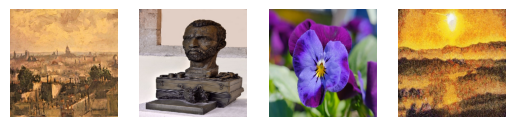

In [34]:
#Fetch a combined batch
combined_batch = next(combined_gen)


#Display the first images
n_images = 4


fig, ax = plt.subplots(nrows = 1, ncols = n_images)


for i in range(n_images):
    img = combined_batch[i]
    ax[i].imshow(img)
    ax[i].axis('off')

plt.show()

